# Import

In [14]:
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, concatenate, UpSampling2D, Dropout, Cropping2D, Softmax, Input
from keras.preprocessing import image

# Setting

In [15]:
image_shape = [128, 128, 1]

In [16]:
keep_prob = 0.5    # Dropout rate

In [17]:
num_of_classes = 2

# Model

In [1]:
def mini_u_net(image_shape, keep_prob, num_of_classes):
  
  # Contracting Path
  
  input_image = Input(image_shape)
  
  conv1_1 = Conv2D(filters = 16, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv1_1')(input_image)
  conv1_2 = Conv2D(filters = 16, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv1_2')(conv1_1)
  
  pool_1 = MaxPooling2D(name = 'pool_1')(conv1_2)
  
  conv2_1 = Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv2_1')(pool_1)
  conv2_2 = Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv2_2')(conv2_1)
  
  pool_2 = MaxPooling2D(name = 'pool_2')(conv2_2)
  
  conv3_1 = Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv3_1')(pool_2)
  conv3_2 = Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv3_2')(conv3_1)
  
  pool_3 = MaxPooling2D(name = 'pool_3')(conv3_2)
  
  conv4_1 = Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv4_1')(pool_3)
  conv4_2 = Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv4_2')(conv4_1)
  
  
  
  # Expanding Path
  
  upconv5_1 = UpSampling2D(name = 'upconv5_1')(conv4_2)
  upconv5_2 = Conv2D(filters = 64, kernel_size = (2, 2), activation = 'relu', padding = 'same', name = 'upconv5_2')(upconv5_1)
  concat_5 = concatenate([upconv5_2, conv3_2], axis = 3, name = 'concat_5')
  
  conv5_1 = Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv5_1')(concat_5)
  conv5_2 = Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv5_2')(conv5_1)
  
  
  upconv6_1 = UpSampling2D(name = 'upconv6_1')(conv5_2)
  upconv6_2 = Conv2D(filters = 32, kernel_size = (2, 2), activation = 'relu', padding = 'same', name = 'upconv6_2')(upconv6_1)
  concat_6 = concatenate([upconv6_2, conv2_2], axis = 3, name = 'concat_6')
  
  conv6_1 = Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv6_1')(concat_6)
  conv6_2 = Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv6_2')(conv6_1)
  
  upconv7_1 = UpSampling2D(name = 'upconv7_1')(conv6_2)
  upconv7_2 = Conv2D(filters = 16, kernel_size = (2, 2), activation = 'relu', padding = 'same', name = 'upconv7_2')(upconv7_1)
  concat_7 = concatenate([upconv7_2, conv1_2], axis = 3, name = 'concat_7')
  
  conv7_1 = Conv2D(filters = 8, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv7_1')(concat_7)
  conv7_2 = Conv2D(filters = 8, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv7_2')(conv7_1)
  
  conv8 = Conv2D(filters = num_of_classes, kernel_size = (1, 1), activation = 'softmax', name = 'conv8')(conv7_2)
  
  model = Model(inputs = input_image, outputs = conv8, name = 'model')
  
  return model

import unet
model = unet.unet(base_level_filters=16,layers=4)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 1)]        0         []                            
                                                                                                  
 expand_conv_0_1 (Conv2D)    (None, 128, 128, 16)         160       ['input_1[0][0]']             
                                                                                                  
 expand_conv_0_2 (Conv2D)    (None, 128, 128, 16)         2320      ['expand_conv_0_1[0][0]']     
                                                                                                  
 pool_0 (MaxPooling2D)       (None, 64, 64, 16)           0         ['expand_conv_0_2[0][0]']     
                                                                                              

In [19]:
u_net = mini_u_net(image_shape, keep_prob, num_of_classes)

In [20]:
u_net.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 128, 128, 1)]        0         []                            
                                                                                                  
 conv1_1 (Conv2D)            (None, 128, 128, 16)         160       ['input_2[0][0]']             
                                                                                                  
 conv1_2 (Conv2D)            (None, 128, 128, 16)         2320      ['conv1_1[0][0]']             
                                                                                                  
 pool_1 (MaxPooling2D)       (None, 64, 64, 16)           0         ['conv1_2[0][0]']             
                                                                                              

# Compile

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_cross_entropy(y_true, y_pred):
	
  true_shape = tf.shape(y_true)
  pred_shape = tf.shape(y_pred)
  
  # reshape such that w and h dim are multiplied together
  y_true_reshaped = tf.reshape( y_true, tf.stack( [-1, true_shape[1] * true_shape[2], true_shape[-1]] ) )
  y_pred_reshaped = tf.reshape( y_pred, tf.stack( [-1, pred_shape[1] * pred_shape[2], pred_shape[-1]] ) )

	# correctly classified
  y_true_reshaped = tf.cast(y_true_reshaped, tf.int32)
  y_true_one = tf.one_hot(y_true_reshaped, depth = pred_shape[-1], axis=-1)
  y_true_one = tf.reshape(y_true_one, tf.stack( [-1, tf.shape(y_true_one)[1], pred_shape[-1]]))
  
  
  return -tf.reduce_mean(y_true_one * tf.math.log(y_pred_reshaped)) 

In [22]:
import keras.backend as K
import tensorflow as tf

def mean_acc(y_true, y_pred):
	
  true_shape = tf.shape(y_true)
  pred_shape = tf.shape(y_pred)
  
  # reshape such that w and h dim are multiplied together
  y_true_reshaped = tf.reshape( y_true, tf.stack( [-1, true_shape[1] * true_shape[2], true_shape[-1]] ))
  y_pred_reshaped = tf.reshape( y_pred, tf.stack( [-1, pred_shape[1] * pred_shape[2], pred_shape[-1]] ) )

	# correctly classified
  y_true_reshaped = tf.cast(y_true_reshaped, tf.int64)
  y_true_one = tf.one_hot(y_true_reshaped, depth = pred_shape[-1], axis=-1)
  y_true_one = tf.reshape(y_true_one, tf.stack( [-1, tf.shape(y_true_one)[1], pred_shape[-1]]))
  
  y_pred_argmax = tf.argmax(y_pred_reshaped, axis = 2)
  y_pred_argmax = tf.reshape(y_pred_argmax, tf.shape(y_true_reshaped))
  
  equal_entries = tf.cast(tf.equal(y_true_reshaped, y_pred_argmax), tf.int64)

  correct_pixels_per_class = tf.reduce_sum(equal_entries, axis=1)
  
  n_pixels_per_class = tf.cast(tf.shape(equal_entries)[1] * tf.shape(equal_entries)[2], tf.int64)

  acc = correct_pixels_per_class / n_pixels_per_class
  # acc_mask = tf.is_finite(acc)
  # acc_masked = tf.boolean_mask(acc,acc_mask)
  
  return acc

In [23]:
u_net.compile(optimizer = 'sgd', loss = custom_cross_entropy, metrics = [mean_acc])

# Training

In [24]:

import os
import numpy as np

data_folder = './output/128x128/'

image_folder = os.path.join(data_folder, 'reconstructions')
mask_folder = os.path.join(data_folder, 'labels')

image_files = os.listdir(image_folder)
mask_files = os.listdir(mask_folder)
input_images = []
input_masks = []

print(len(image_files))

for i in range(len(image_files)):
    image_path = os.path.join(image_folder, f'reconstruction_{i}.npy')
    mask_path = os.path.join(mask_folder, f'labels_{i}.npy')

    if not os.path.exists(image_path) or not os.path.exists(mask_path):
        continue

    image = np.load(image_path)
    mask = np.load(mask_path)

    # Reshape to 128x128x1
    image = np.reshape(image, (128, 128, 1))

    # Normalize image from 0, 1
    image = (image - np.min(image)) / (np.max(image) - np.min(image))

    # Reshape to 128x128x2
    # 1 -> background
    # 2 -> foreground
    mask = np.reshape(mask, (128, 128, 1)) - 1
    
    input_images.append(image)
    input_masks.append(mask)

input_array = np.array(input_images)
gt_array = np.array(input_masks)

# Get list of all possible values of gt_array
gt_array_values = np.unique(gt_array)
print(gt_array_values)

# get min and max values of input_array
print(np.min(input_array))
print(np.max(input_array))

print(input_array.shape)
print(gt_array.shape)
r = u_net.fit(x = input_array, y = gt_array, validation_split = 0.1, epochs = 20)

500
[0 1]
0.0
1.0
(500, 128, 128, 1)
(500, 128, 128, 1)
Epoch 1/20
15/15 [==============================] - 9s 573ms/step - loss: 0.3199 - mean_acc: 0.9290 - val_loss: 0.3014 - val_mean_acc: 0.9415
Epoch 2/20
15/15 [==============================] - 9s 566ms/step - loss: 0.2905 - mean_acc: 0.9298 - val_loss: 0.2719 - val_mean_acc: 0.9415
Epoch 3/20
15/15 [==============================] - 8s 558ms/step - loss: 0.2626 - mean_acc: 0.9298 - val_loss: 0.2436 - val_mean_acc: 0.9415
Epoch 4/20
15/15 [==============================] - 8s 561ms/step - loss: 0.2365 - mean_acc: 0.9298 - val_loss: 0.2178 - val_mean_acc: 0.9415
Epoch 5/20
15/15 [==============================] - 9s 574ms/step - loss: 0.2134 - mean_acc: 0.9298 - val_loss: 0.1948 - val_mean_acc: 0.9415
Epoch 6/20
15/15 [==============================] - 9s 581ms/step - loss: 0.1938 - mean_acc: 0.9298 - val_loss: 0.1766 - val_mean_acc: 0.9415
Epoch 7/20
15/15 [==============================] - 9s 588ms/step - loss: 0.1794 - mean_acc:

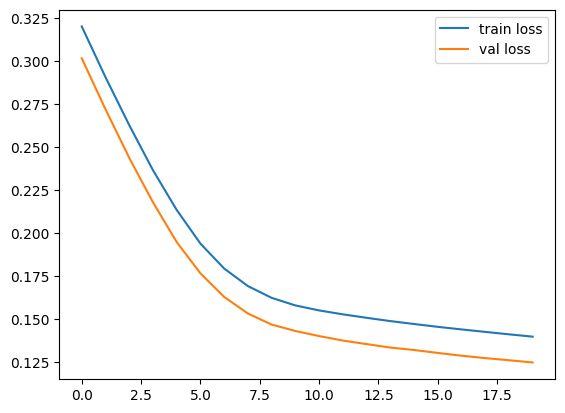

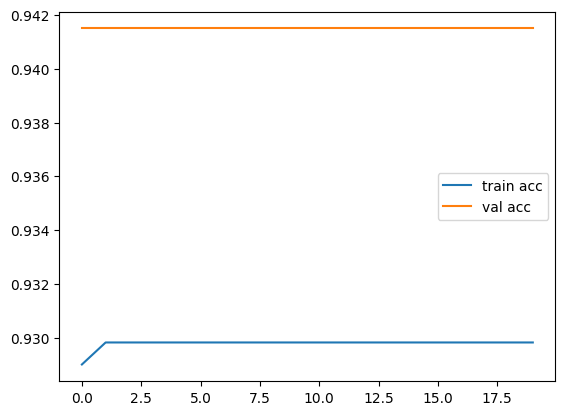

In [26]:
import matplotlib.pyplot as plt
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# accuracies
plt.plot(r.history['mean_acc'], label='train acc')
plt.plot(r.history['val_mean_acc'], label='val acc')
plt.legend()
plt.show()